DATASET: https://www.kaggle.com/datasets/uciml/iris

# BUSSINESS UNDERSTANDING

Iris adalah sebuah genus dalam famili Iridaceae yang mencakup 260–300 spesies tumbuhan berbunga. Tumbuhan tersebut mengambil nama dari kata bahasa Yunani untuk pelangi, yang juga merupakan nama dari dewi pelangi Yunani, Iris.

Tumbuhan Iris memiliki berbagaicam jenis dengan visual yang berbeda walau sama indahnya. Dengan banyaknya jenis tumbuhan tersebut dapat membuat orang lain kebingungan untuk membedakannya.

Model ini dibuat untuk mempermudah masyarakat yang menyukai tumbuhan iris untuk mempermudah membedakan antar jenisnya. Model ini pun dibuat menggunakan metode klasifikasi dengan algoritma regresi linear

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Iris.csv')

# DATA UNDERSTANDING

Deskripsi Tabel:

SepalLengthCm : Panjang Sepal Bungan Dalam Cm

SepalWidthCm : Lebar Sepal Bungan Dalam Cm

PetalLengthCm : Panjang Kelopak Bunga Dalam Cm

PetalWidthCm : Lebar Kelopak Bunga Dalam Cm

Species : Jenis spesies Bunga Iris (Iris-setosa (0), Iris-versicolor (1), Iris-virginica (2))

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.duplicated().sum()

0

# DATA PREPROSESSING

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='Count'>

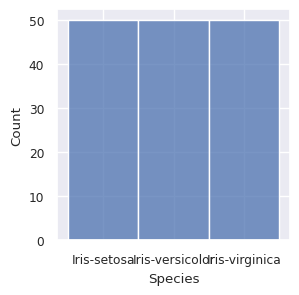

In [12]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='Species')

In [13]:
df = df.drop('Id', axis=1)

In [14]:
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [15]:
df = df.rename(columns={'SepalLengthCm': 'SLCm',
                        'SepalWidthCm': 'SWCm',
                        'PetalLengthCm': 'PLCm',
                        'PetalWidthCm': 'PWCm'})

In [16]:
df.head()

,SLCm,SWCm,PLCm,PWCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='SLCm', ylabel='SWCm'>

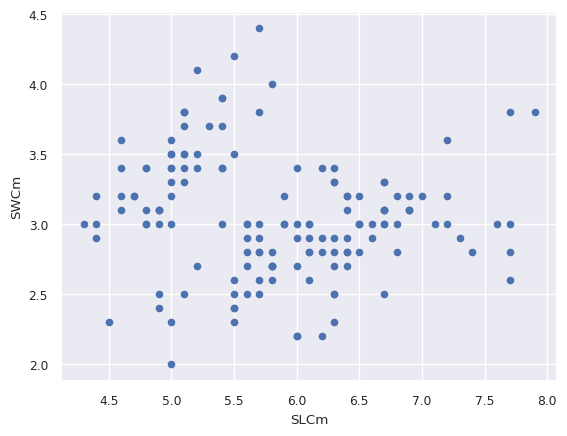

In [17]:
df.plot(kind="scatter", x="SLCm", y="SWCm")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


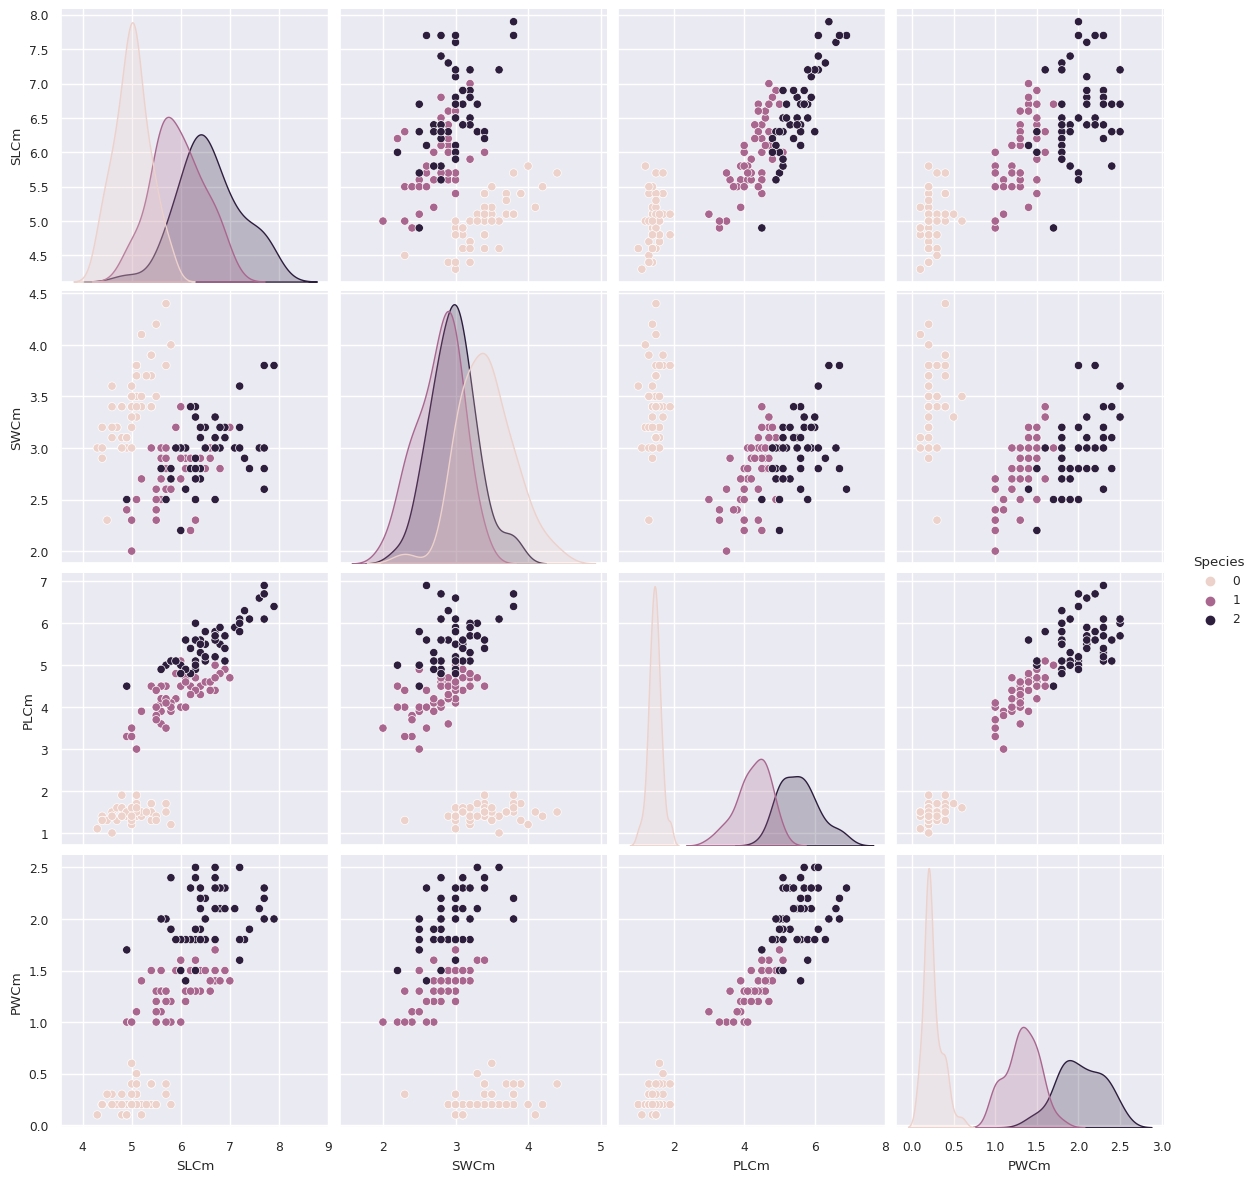

In [18]:
sns.pairplot(df, hue="Species", size=3)

# MODELLING

In [19]:
df.columns

Index(['SLCm', 'SWCm', 'PLCm', 'PWCm', 'Species'], dtype='object')

In [20]:
X = df.drop(columns='Species', axis=1)
Y = df['Species']

In [21]:
print(X)

     SLCm  SWCm  PLCm  PWCm
0     5.1   3.5   1.4   0.2
1     4.9   3.0   1.4   0.2
2     4.7   3.2   1.3   0.2
3     4.6   3.1   1.5   0.2
4     5.0   3.6   1.4   0.2
..    ...   ...   ...   ...
145   6.7   3.0   5.2   2.3
146   6.3   2.5   5.0   1.9
147   6.5   3.0   5.2   2.0
148   6.2   3.4   5.4   2.3
149   5.9   3.0   5.1   1.8

[150 rows x 4 columns]


In [22]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (90, 4) (60, 4)


In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print("Akurasi data training : ", training_data_accuracy*100)

Akurasi data training :  96.66666666666667


In [29]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print("Akurasi data testing : ", testing_data_accuracy*100)

Akurasi data testing :  100.0


In [31]:
df.head()

,SLCm,SWCm,PLCm,PWCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# EVALUATION

In [32]:
input_data = (5.1,3.5,1.4,0.2) # 0

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
print()

if prediction == 0:
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Setosa')
elif prediction == 1:
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Versicolor')
else:
    print('Tumbuhan Termasuk Kedalam Kelompok Iris Virginica')

[0]

Tumbuhan Termasuk Kedalam Kelompok Iris Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

In [33]:
import pickle

In [34]:
filename = 'iris_model.sav'
pickle.dump(model, open(filename, 'wb'))